In [142]:
#Importing Library

In [1]:
import pandas as pd      
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [5]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)


In [5]:
#Load Dataset

In [6]:
df = pd.read_csv("medicines_data.csv")

In [7]:
#data inspection

In [7]:
print("Shape of data:", df.shape)

Shape of data: (248218, 19)


In [8]:
print("Columns:", df.columns.tolist())

Columns: ['medicine_id', 'medicine_name', 'substitutes', 'uses', 'side_effects', 'chemical_class', 'therapeutic_class', 'habit_forming', 'action_class', 'city', 'area', 'pharmacy_name', 'store_stock', 'warehouse_stock', 'price', 'expiry_date', 'days_to_expiry', 'stock_status', 'needs_reorder']


In [9]:
df.describe()

,medicine_id,store_stock,warehouse_stock,price,days_to_expiry,needs_reorder
count,248218.000000,248218.000000,248218.000000,248218.000000,248218.000000,248218.000000
mean,124109.500000,149.335713,403.094614,1290.090088,123.905889,0.100609
std,71654.508896,86.583413,165.911357,699.106881,376.956491,0.300811
min,1.000000,0.000000,10.000000,80.020000,-530.000000,0.000000
25%,62055.250000,74.000000,279.000000,684.650000,-201.000000,0.000000
50%,124109.500000,149.000000,403.000000,1288.505000,123.000000,0.000000
75%,186163.750000,224.000000,527.000000,1897.187500,450.000000,0.000000
max,248218.000000,299.000000,797.000000,2500.000000,778.000000,1.000000


In [10]:
df.isnull().sum()

medicine_id               0
medicine_name             0
substitutes               0
uses                      0
side_effects              0
chemical_class       110427
therapeutic_class        69
habit_forming             0
action_class         110182
city                      0
area                      0
pharmacy_name             0
store_stock               0
warehouse_stock           0
price                     0
expiry_date               0
days_to_expiry            0
stock_status              0
needs_reorder             0
dtype: int64

In [11]:
df=df.drop("chemical_class",axis=1)
df

,medicine_id,medicine_name,substitutes,uses,side_effects,therapeutic_class,habit_forming,action_class,city,area,pharmacy_name,store_stock,warehouse_stock,price,expiry_date,days_to_expiry,stock_status,needs_reorder
0,1,augmentin 625 duo tablet,"['Penciclav 500 mg/125 mg Tablet', 'Moxikind-C...",['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Diarrhea']",ANTI INFECTIVES,No,NaN,Islamabad,F-10,HealthPlus,65,119,1687.82,03-10-2026,324,in_stock,0
1,2,azithral 500 tablet,"['Zithrocare 500mg Tablet', 'Azax 500 Tablet',...",['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Abdominal pain', 'Diar...",ANTI INFECTIVES,No,Macrolides,Islamabad,I-8,Dawaai Pharmacy,247,705,2486.81,03-05-2026,171,in_stock,0
2,3,ascoril ls syrup,"['Solvin LS Syrup', 'Ambrodil-LX Syrup', 'Zero...",['Treatment of Cough with mucus'],"['Nausea', 'Vomiting', 'Diarrhea', 'Upset stom...",RESPIRATORY,No,NaN,Islamabad,I-8,Dawaai Pharmacy,51,190,1478.35,17-09-2027,673,in_stock,0
3,4,allegra 120mg tablet,"['Lcfex Tablet', 'Etofex 120mg Tablet', 'Nexof...",['Treatment of Sneezing and runny nose due to ...,"['Headache', 'Drowsiness', 'Dizziness', 'Nausea']",RESPIRATORY,No,H1 Antihistaminics (second Generation),Islamabad,I-8,Dawaai Pharmacy,65,118,1709.60,24-12-2024,-324,in_stock,0
4,5,avil 25 tablet,['Eralet 25mg Tablet'],['Treatment of Allergic conditions'],"['Sleepiness', 'Dryness in mouth']",RESPIRATORY,No,H1 Antihistaminics (First Generation),Lahore,Gulberg,Servaid Pharmacy,37,343,1792.57,14-12-2024,-334,in_stock,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248213,248214,zestrain 100mg/325mg/250mg tablet mr,"['Aclotec MR 100mg/325mg/250mg Tablet', 'SAMON...",['Treatment of Muscular pain'],"['Nausea', 'Vomiting', 'Heartburn', 'Stomach p...",PAIN ANALGESICS,No,NaN,Islamabad,F-7,MediZone,26,467,1854.40,18-07-2026,247,low_stock,1
248214,248215,zoxinace 200mg tablet sr,"['Algic 200mg Tablet SR', 'Topnac 200mg Tablet...",[' Pain relief'],"['Dizziness', 'Indigestion', 'Nausea', 'Abdomi...",PAIN ANALGESICS,No,NSAID's- Non-Selective COX 1&2 Inhibitors (ace...,Karachi,Nazimabad,HealthPlus,110,123,1416.02,23-08-2026,283,in_stock,0
248215,248216,zivex 25mg tablet,"['HD Zine 25mg Tablet', 'Hydrocas 25mg Tablet'...","['Treatment of Anxiety', 'Treatment of Skin co...","['Sedation', 'Nausea', 'Vomiting', 'Upset stom...",RESPIRATORY,No,H1 Antihistaminics (First Generation),Islamabad,F-7,Servaid Pharmacy,297,640,985.49,21-04-2027,524,in_stock,0
248216,248217,zi fast 500mg injection,"['Zycin 500mg Injection', 'Aziwok 500mg Inject...",['Treatment of Bacterial infections'],"['Injection site reactions (pain, swelling, re...",ANTI INFECTIVES,No,Macrolides,Lahore,Model Town,Servaid Pharmacy,21,138,1227.64,21-08-2024,-449,low_stock,1


In [12]:
df.isnull().sum()

medicine_id               0
medicine_name             0
substitutes               0
uses                      0
side_effects              0
therapeutic_class        69
habit_forming             0
action_class         110182
city                      0
area                      0
pharmacy_name             0
store_stock               0
warehouse_stock           0
price                     0
expiry_date               0
days_to_expiry            0
stock_status              0
needs_reorder             0
dtype: int64

In [14]:
#target variable

In [13]:
df['is_available'] = (df['stock_status'] != 'out_of_stock').astype(int)
# If the value is NOT equal to out_of_stock returns True
# If the value iS equal to out_of_stock returns False

In [14]:
df['is_available']

0         1
1         1
2         1
3         1
4         1
         ..
248213    1
248214    1
248215    1
248216    1
248217    1
Name: is_available, Length: 248218, dtype: int64

In [15]:
df = df.drop("action_class",axis=1)
df

,medicine_id,medicine_name,substitutes,uses,side_effects,therapeutic_class,habit_forming,city,area,pharmacy_name,store_stock,warehouse_stock,price,expiry_date,days_to_expiry,stock_status,needs_reorder,is_available
0,1,augmentin 625 duo tablet,"['Penciclav 500 mg/125 mg Tablet', 'Moxikind-C...",['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Diarrhea']",ANTI INFECTIVES,No,Islamabad,F-10,HealthPlus,65,119,1687.82,03-10-2026,324,in_stock,0,1
1,2,azithral 500 tablet,"['Zithrocare 500mg Tablet', 'Azax 500 Tablet',...",['Treatment of Bacterial infections'],"['Vomiting', 'Nausea', 'Abdominal pain', 'Diar...",ANTI INFECTIVES,No,Islamabad,I-8,Dawaai Pharmacy,247,705,2486.81,03-05-2026,171,in_stock,0,1
2,3,ascoril ls syrup,"['Solvin LS Syrup', 'Ambrodil-LX Syrup', 'Zero...",['Treatment of Cough with mucus'],"['Nausea', 'Vomiting', 'Diarrhea', 'Upset stom...",RESPIRATORY,No,Islamabad,I-8,Dawaai Pharmacy,51,190,1478.35,17-09-2027,673,in_stock,0,1
3,4,allegra 120mg tablet,"['Lcfex Tablet', 'Etofex 120mg Tablet', 'Nexof...",['Treatment of Sneezing and runny nose due to ...,"['Headache', 'Drowsiness', 'Dizziness', 'Nausea']",RESPIRATORY,No,Islamabad,I-8,Dawaai Pharmacy,65,118,1709.60,24-12-2024,-324,in_stock,0,1
4,5,avil 25 tablet,['Eralet 25mg Tablet'],['Treatment of Allergic conditions'],"['Sleepiness', 'Dryness in mouth']",RESPIRATORY,No,Lahore,Gulberg,Servaid Pharmacy,37,343,1792.57,14-12-2024,-334,in_stock,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248213,248214,zestrain 100mg/325mg/250mg tablet mr,"['Aclotec MR 100mg/325mg/250mg Tablet', 'SAMON...",['Treatment of Muscular pain'],"['Nausea', 'Vomiting', 'Heartburn', 'Stomach p...",PAIN ANALGESICS,No,Islamabad,F-7,MediZone,26,467,1854.40,18-07-2026,247,low_stock,1,1
248214,248215,zoxinace 200mg tablet sr,"['Algic 200mg Tablet SR', 'Topnac 200mg Tablet...",[' Pain relief'],"['Dizziness', 'Indigestion', 'Nausea', 'Abdomi...",PAIN ANALGESICS,No,Karachi,Nazimabad,HealthPlus,110,123,1416.02,23-08-2026,283,in_stock,0,1
248215,248216,zivex 25mg tablet,"['HD Zine 25mg Tablet', 'Hydrocas 25mg Tablet'...","['Treatment of Anxiety', 'Treatment of Skin co...","['Sedation', 'Nausea', 'Vomiting', 'Upset stom...",RESPIRATORY,No,Islamabad,F-7,Servaid Pharmacy,297,640,985.49,21-04-2027,524,in_stock,0,1
248216,248217,zi fast 500mg injection,"['Zycin 500mg Injection', 'Aziwok 500mg Inject...",['Treatment of Bacterial infections'],"['Injection site reactions (pain, swelling, re...",ANTI INFECTIVES,No,Lahore,Model Town,Servaid Pharmacy,21,138,1227.64,21-08-2024,-449,low_stock,1,1


In [16]:
#fill with na

In [17]:
df['therapeutic_class'] = df['therapeutic_class'].fillna("Therapist")

In [18]:
df.to_csv("Medicine.csv", index=False)


In [19]:
cat_cols = [
    'therapeutic_class',
    'habit_forming',
    'city',
    'area',
    'pharmacy_name'
]

In [20]:
for c in cat_cols:
    df[c] = df[c].fillna("Unknown")


In [21]:
#numeric columns

In [22]:
num_cols = ['store_stock', 'warehouse_stock', 'price', 'days_to_expiry']
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())


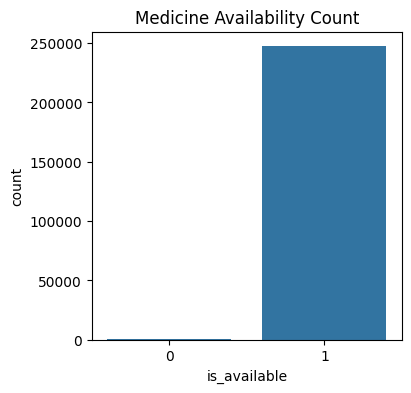

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(x=df["is_available"])
plt.title("Medicine Availability Count")
plt.show()


In [24]:
for c in num_cols:
    low, high = df[c].quantile([0.01, 0.99])
    df[c] = df[c].clip(low, high)

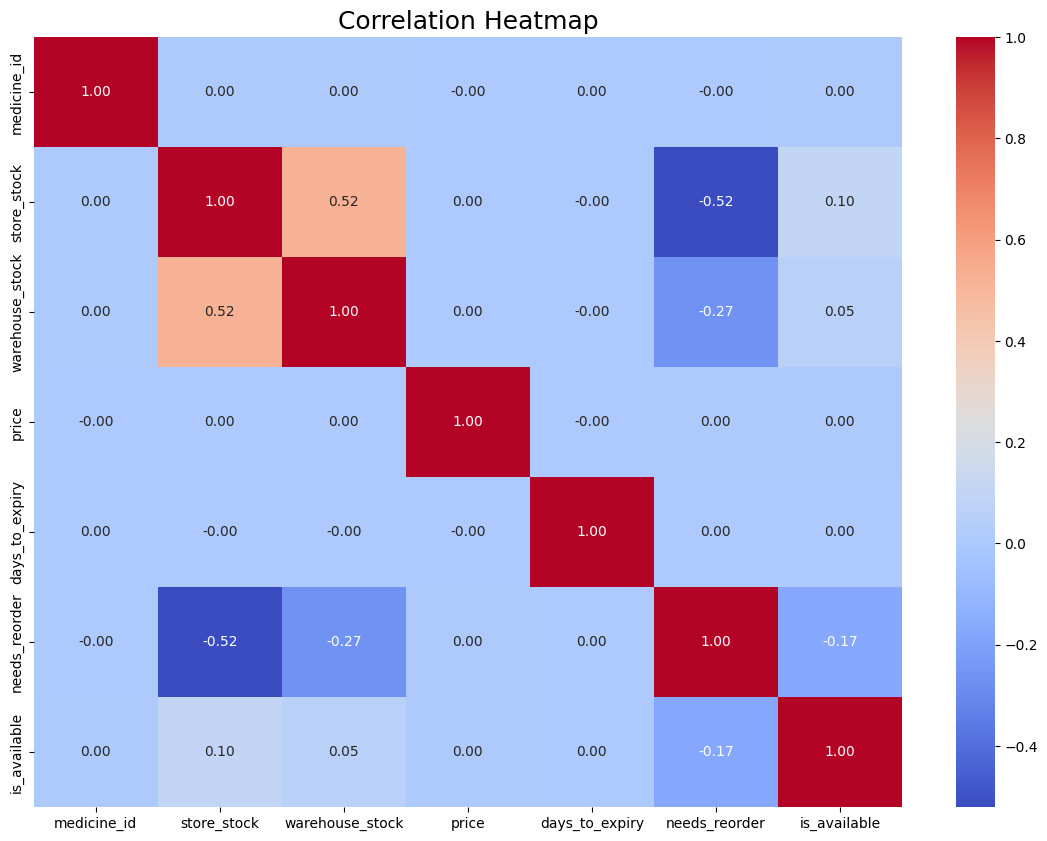

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

In [26]:
target_corr = corr_matrix["is_available"].sort_values(ascending=False)
print("Correlation With Target:\n")
print(target_corr)
before=df.copy()

Correlation With Target:

is_available       1.000000
store_stock        0.097766
warehouse_stock    0.050098
price              0.002649
medicine_id        0.002478
days_to_expiry     0.001353
needs_reorder     -0.171711
Name: is_available, dtype: float64


In [27]:
feature_cols = num_cols + cat_cols

X = df[feature_cols]
y = df['is_available']


In [28]:
feature_cols

['store_stock',
 'warehouse_stock',
 'price',
 'days_to_expiry',
 'therapeutic_class',
 'habit_forming',
 'city',
 'area',
 'pharmacy_name']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [30]:
#under-sampling

In [31]:
# train_df = X_train.copy()
# train_df['is_available'] = y_train.values

In [32]:
# minority = train_df[train_df['is_available'] == 0]
# majority = train_df[train_df['is_available'] == 1]#filters the DataFrame to get only rows where is_available = 0


In [33]:
# ratio = 5  # keep majority efines a ratio of 2:1 (majority:minority)
# majority_sampled = majority.sample(n=len(minority) * ratio, random_state=42)#frac=1.0 means "return 100% of the rows" (i.e., all rows)
# #sample frac=1.0 randomly shuffles all rows

In [34]:
# balanced_df = pd.concat([minority, majority_sampled], axis=0)
# balanced_df = balanced_df.sample(frac=1.0, random_state=42)#suflling the rows 


In [35]:
from imblearn.over_sampling import SMOTENC
cat_cols = ['therapeutic_class', 'habit_forming', 'city', 'area', 'pharmacy_name']
categorical_indices = [X.columns.get_loc(col) for col in cat_cols]

sm = SMOTENC(categorical_features=categorical_indices, random_state=42)

X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)


print("Before SMOTE:", X_train.shape, y_train.value_counts().to_dict())
print("After SMOTE:", X_train_bal.shape, y_train_bal.value_counts().to_dict())


Before SMOTE: (198574, 9) {1: 197921, 0: 653}
After SMOTE: (395842, 9) {1: 197921, 0: 197921}


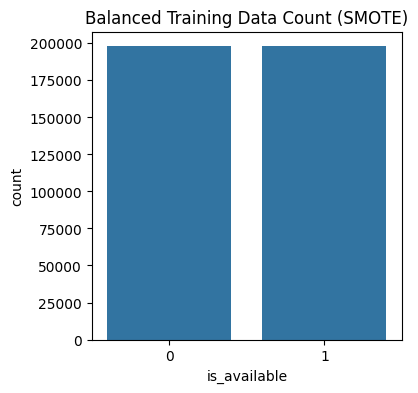

In [36]:
plt.figure(figsize=(4,4))
sns.countplot(x=y_train_bal)
plt.title("Balanced Training Data Count (SMOTE)")
plt.show()

In [37]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
#making pipeline for using the scaler in future 

In [38]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [39]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

In [40]:
#models

In [41]:
model = {
    "GradientBoosting": GradientBoostingClassifier(
        random_state=42
    )
}

In [42]:
for name, model in model.items():
    clf = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    

In [43]:
#fit data

In [44]:

clf.fit(X_train_bal, y_train_bal)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
#predict

In [46]:
y_pred = clf.predict(X_test)

In [47]:
y_proba = clf.predict_proba(X_test)[:, 1]


In [48]:
#accuracy metrice

In [49]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)


In [50]:
 ##acc = accuracy_score(y_test, y_pred)
print("Accuracy :", acc)


Accuracy : 0.9930908065425832


In [51]:
print("Precision:", prec)
    

Precision: 0.9999186098563464


In [52]:
print("Recall   :", rec)

Recall   : 0.9931488854307714


In [53]:
print("F1-score :", f1)

F1-score : 0.9965222504993562


In [54]:
print("ROC-AUC  :", roc)

ROC-AUC  : 0.9961745246951703


In [55]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[  159     4]
 [  339 49142]]


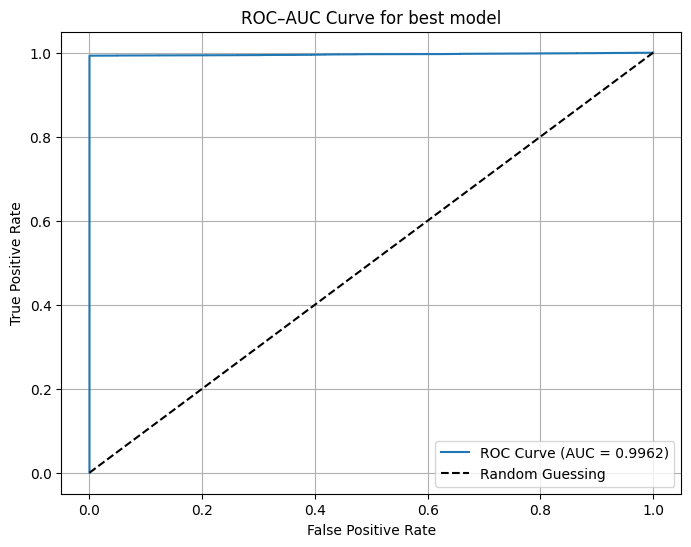

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve for best model")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [57]:
#predict function

In [58]:
#confusion mertics

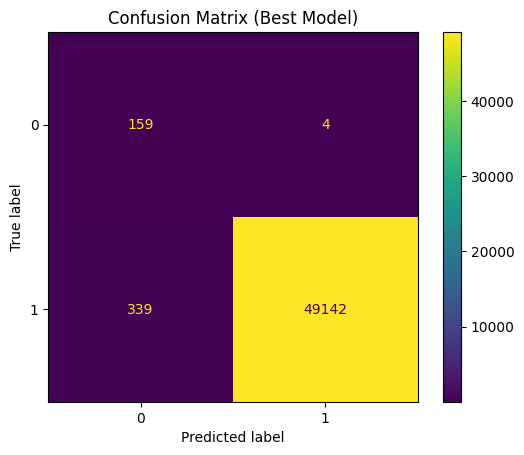

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix (Best Model)")
plt.show()


In [60]:
def check_medicine_availability(sample):
    sample_df = pd.DataFrame([sample])
    pred = clf.predict(sample_df)[0]
    proba = clf.predict_proba(sample_df)[0][1]
    status = "AVAILABLE" if pred == 1 else "OUT OF STOCK"
    print("Prediction:", status)
    print("Probability available:", proba)

    return status, proba

In [61]:
example = {
    "store_stock": 0,
    "warehouse_stock": 10,
    "price": 120,
    "days_to_expiry": 90,
    "therapeutic_class": "Therapist",
    "habit_forming": "No",
    "city": "Lahore",
    "area": "Johar Town",
    "pharmacy_name": "ABC Pharmacy"
}


In [62]:
#checking

In [63]:
check_medicine_availability(example)

Prediction: OUT OF STOCK
Probability available: 0.02923571579957501


('OUT OF STOCK', np.float64(0.02923571579957501))